# Deep Classification - Number Recognition with Multidimensional Reduction

### Gerekli kütüphaneleri yükleme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


### Digits veri setini yükleme

In [2]:
digits = load_digits()

### Görüntü gösterme fonksiyonu

In [3]:
def show_image(image_data):
    plt.imshow(image_data, cmap="gray")
    plt.axis("off")
    plt.show()

### Veriyi düzleştirme ve normalleştirme

In [4]:
data = digits.images.reshape((len(digits.images), -1))
scaler = StandardScaler()
data = scaler.fit_transform(data)

### Veriyi eğitim ve test setlerine bölme

In [5]:
train_data, test_data, train_target, test_target = train_test_split(data, digits.target, test_size=0.2, random_state=42)

## PCA 
### Veriyi PCA kullanarak boyut indirgeme

In [23]:
pca = PCA(n_components=3)
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)


### MLPClassifier kullanarak model oluşturma

In [24]:
mlp_model_pca = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model_pca.fit(train_data_pca, train_target)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

### Test setindeki ilk 3 örneği tahmin etme ve karşılaştırma

------ PCA ------


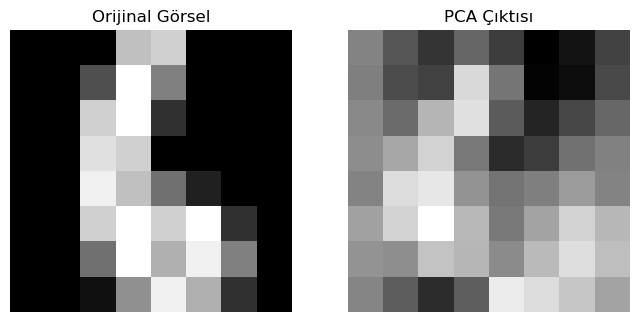

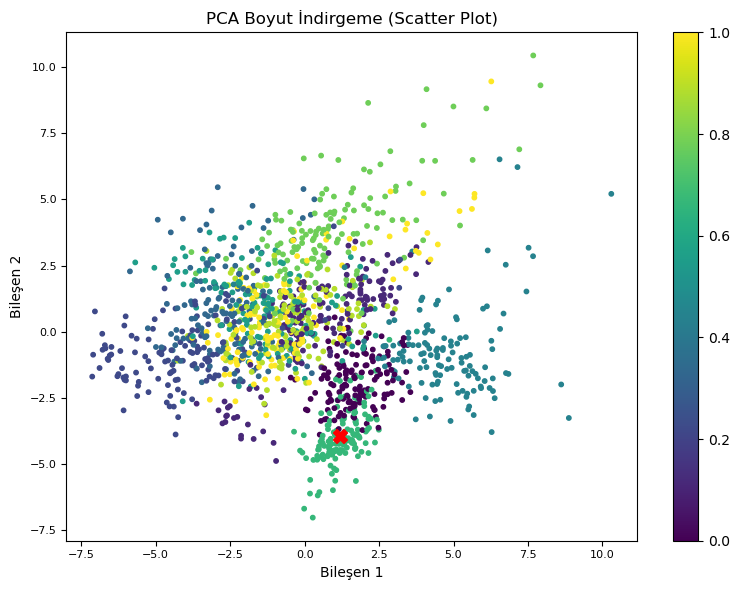

PCA Tahmin: 6, Gerçek Değer: 6
------------------------------


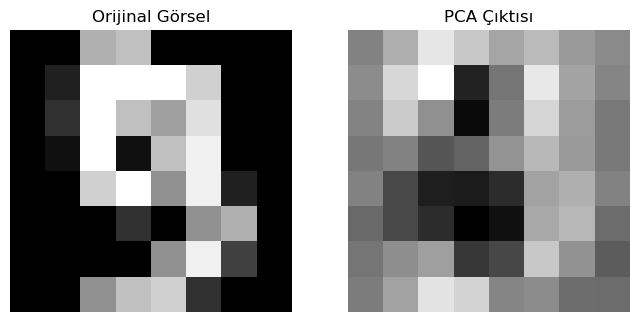

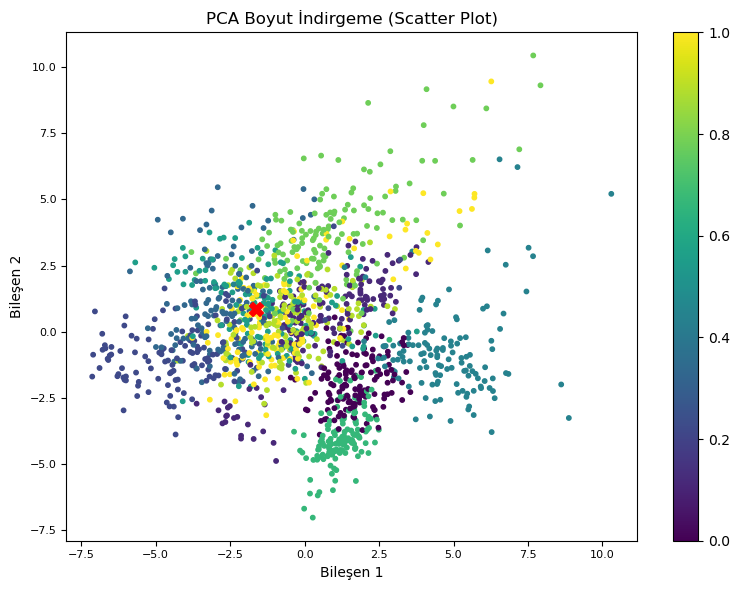

PCA Tahmin: 3, Gerçek Değer: 9
------------------------------


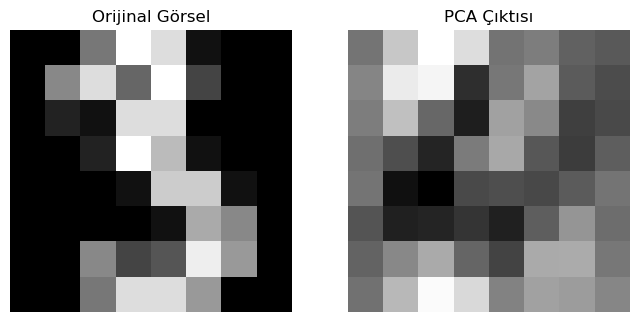

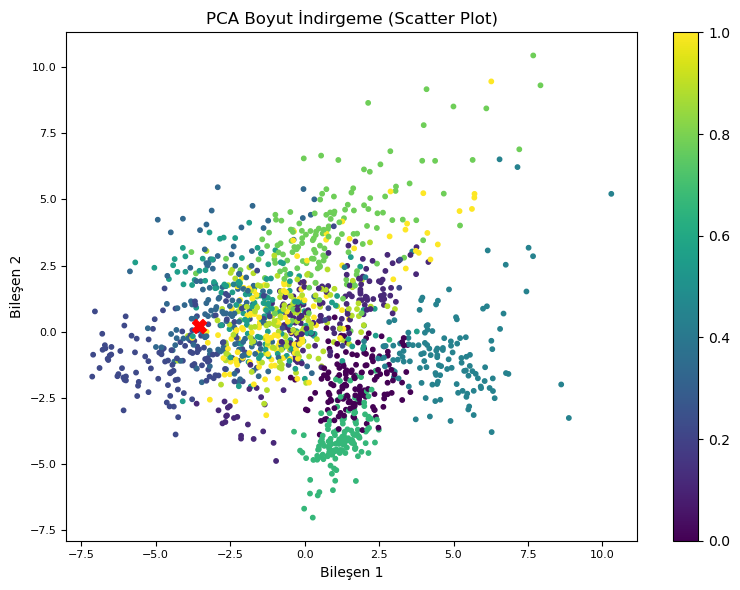

PCA Tahmin: 3, Gerçek Değer: 3
------------------------------


In [25]:
print("------ PCA ------")
for i in range(3):
    index = i
    test_example_pca = test_data_pca[index].reshape(1, -1)

    # Tahmin yapma
    prediction_pca = mlp_model_pca.predict(test_example_pca)

    # Gerçek değeri alma
    true_label_pca = test_target[index]

    # Orijinal görseli ve PCA çıktısını yan yana gösterme
    plt.figure(figsize=(8, 4))

    # Orijinal görsel
    plt.subplot(1, 2, 1)
    plt.imshow(digits.images[test_target[index]], cmap="gray")
    plt.title("Orijinal Görsel")
    plt.axis("off")

    # PCA çıktısı
    plt.subplot(1, 2, 2)
    plt.imshow(pca.inverse_transform(test_data_pca[index]).reshape(8, 8), cmap="gray")
    plt.title("PCA Çıktısı")
    plt.axis("off")

    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=train_target, cmap='viridis', s=10)
    plt.scatter(test_data_pca[index, 0], test_data_pca[index, 1], c='red', marker='X', s=100)  # Test verisini belirtiyoruz
    plt.colorbar()
    plt.title("PCA Boyut İndirgeme (Scatter Plot)")
    plt.xlabel("Bileşen 1")
    plt.ylabel("Bileşen 2")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Tahmin ve gerçek değeri yazdırma
    print(f"PCA Tahmin: {prediction_pca[0]}, Gerçek Değer: {true_label_pca}")
    print("-" * 30)


### Test seti üzerinde model performansını değerlendirme

In [26]:
test_predictions_pca = mlp_model_pca.predict(test_data_pca)
test_accuracy_pca = accuracy_score(test_target, test_predictions_pca)
print("\nPCA Test Seti Doğruluk:", test_accuracy_pca)



PCA Test Seti Doğruluk: 0.7027777777777777


## LLE 
### Veriyi LLE kullanarak boyut indirgeme

In [27]:
lle_model = LocallyLinearEmbedding(n_components=3, random_state=42)
train_data_lle = lle_model.fit_transform(train_data)
test_data_lle = lle_model.transform(test_data)


### MLPClassifier kullanarak model oluşturma

In [28]:
mlp_model_lle = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model_lle.fit(train_data_lle, train_target)

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

### Test setindeki ilk 3 örneği tahmin etme ve karşılaştırma

------ LLE ------
Orijinal Görsel:


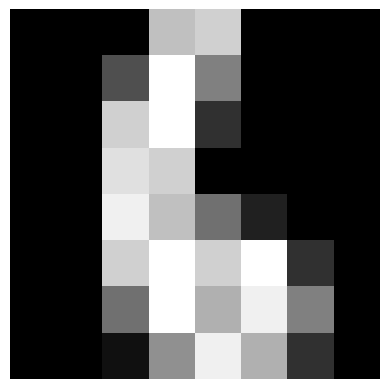

LLE Çıktısı:


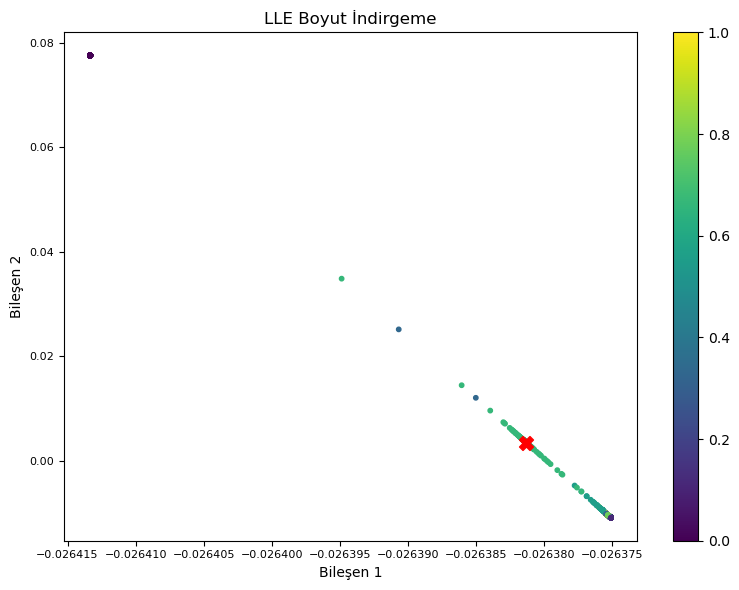

LLE Tahmin: 6, Gerçek Değer: 6
------------------------------
Orijinal Görsel:


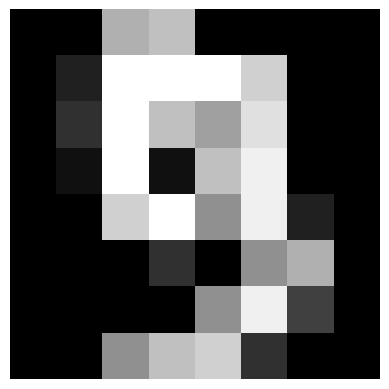

LLE Çıktısı:


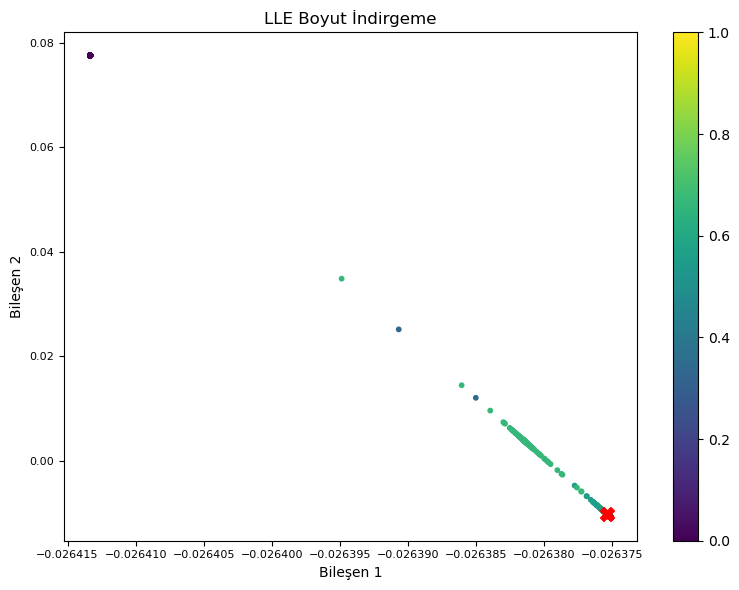

LLE Tahmin: 9, Gerçek Değer: 9
------------------------------
Orijinal Görsel:


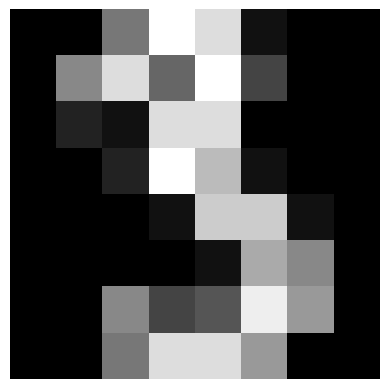

LLE Çıktısı:


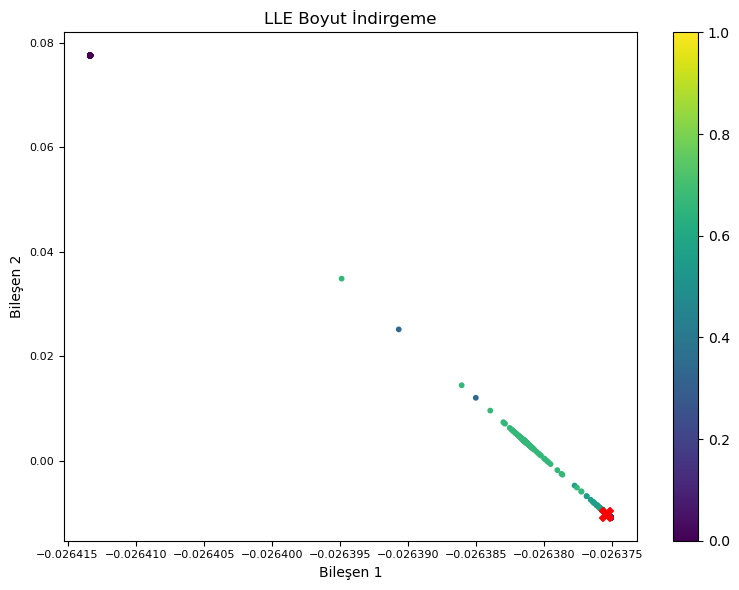

LLE Tahmin: 3, Gerçek Değer: 3
------------------------------


In [29]:
print("------ LLE ------")
for i in range(3):
    index = i
    test_example_lle = test_data_lle[index].reshape(1, -1)

    # Tahmin yapma
    prediction_lle = mlp_model_lle.predict(test_example_lle)

    # Gerçek değeri alma
    true_label_lle = test_target[index]

    # Orijinal görseli gösterme
    print("Orijinal Görsel:")
    plt.imshow(digits.images[test_target[index]], cmap="gray")
    plt.axis("off")
    plt.show()

    # Görüntüyü görselleştirme (LLE çıktısı olduğu için scatter plot kullanıyoruz)
    print("LLE Çıktısı:")
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_lle[:, 0], train_data_lle[:, 1], c=train_target, cmap='viridis', s=10)
    plt.scatter(test_data_lle[index, 0], test_data_lle[index, 1], c='red', marker='X', s=100)  # Test verisini belirtiyoruz
    plt.colorbar()
    plt.title("LLE Boyut İndirgeme")
    plt.xlabel("Bileşen 1")
    plt.ylabel("Bileşen 2")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Tahmin ve gerçek değeri yazdırma
    print(f"LLE Tahmin: {prediction_lle[0]}, Gerçek Değer: {true_label_lle}")
    print("-" * 30)


### Test seti üzerinde model performansını değerlendirme

In [30]:
test_predictions_lle = mlp_model_lle.predict(test_data_lle)
test_accuracy_lle = accuracy_score(test_target, test_predictions_lle)
print("\nLLE Test Seti Doğruluk:", test_accuracy_lle)


LLE Test Seti Doğruluk: 0.8083333333333333


## Isomap 
### Veriyi Isomap kullanarak boyut indirgeme

In [31]:
isomap_model = Isomap(n_components=3, n_neighbors=5)
train_data_isomap = isomap_model.fit_transform(train_data)
test_data_isomap = isomap_model.transform(test_data)


###  MLPClassifier kullanarak model oluşturma

In [32]:
mlp_model_isomap = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model_isomap.fit(train_data_isomap, train_target)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

### Test setindeki ilk 3 örneği tahmin etme ve karşılaştırma

------ Isomap ------
Orijinal Görsel:


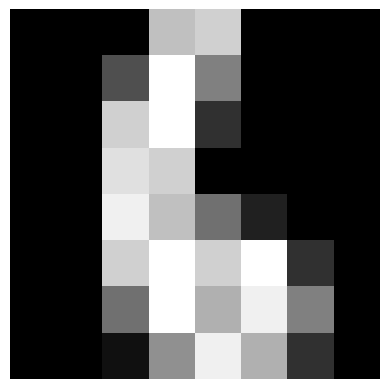

Isomap Çıktısı:


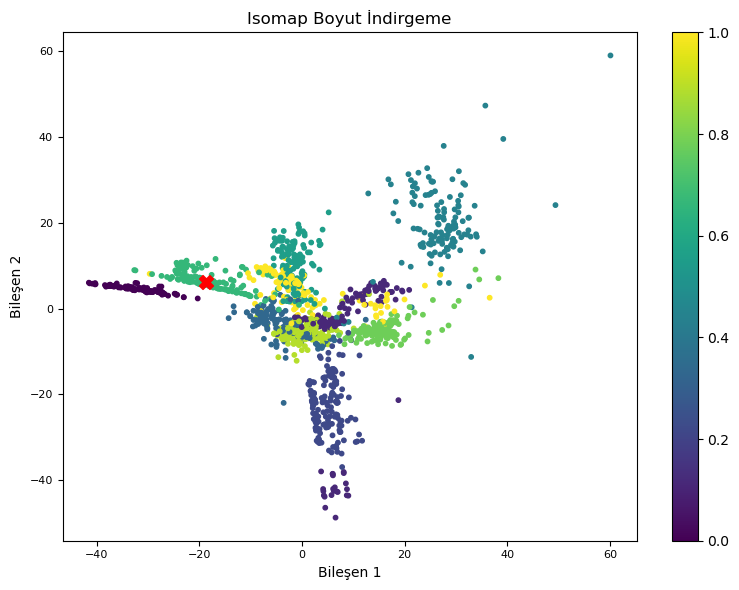

Isomap Tahmin: 6, Gerçek Değer: 6
------------------------------
Orijinal Görsel:


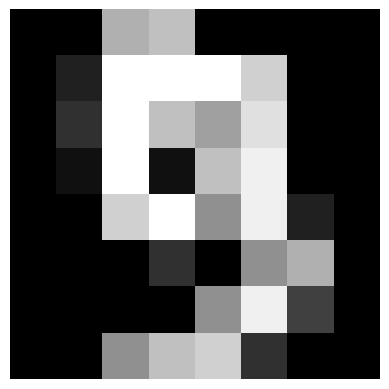

Isomap Çıktısı:


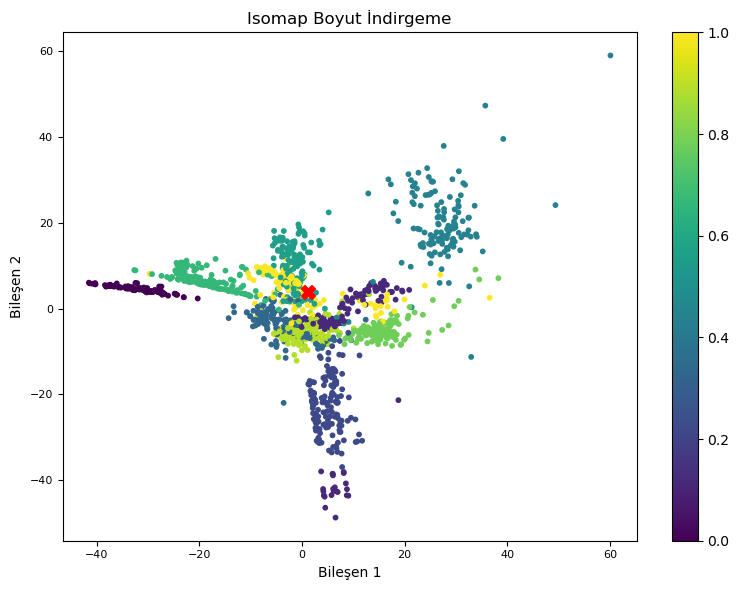

Isomap Tahmin: 9, Gerçek Değer: 9
------------------------------
Orijinal Görsel:


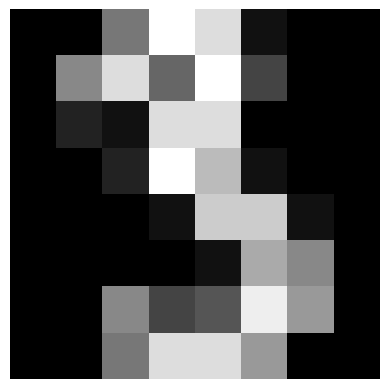

Isomap Çıktısı:


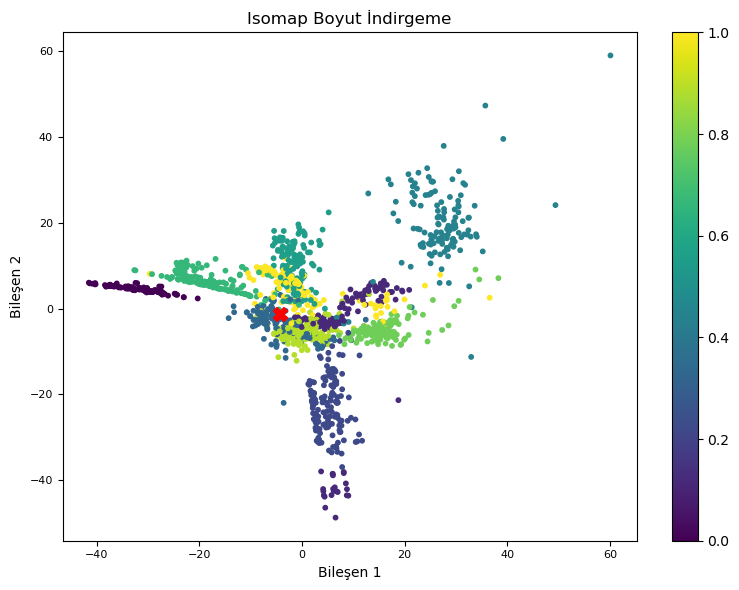

Isomap Tahmin: 3, Gerçek Değer: 3
------------------------------


In [33]:
print("------ Isomap ------")
for i in range(3):
    index = i
    test_example_isomap = test_data_isomap[index].reshape(1, -1)

    # Tahmin yapma
    prediction_isomap = mlp_model_isomap.predict(test_example_isomap)

    # Gerçek değeri alma
    true_label_isomap = test_target[index]

    # Orijinal görseli gösterme
    print("Orijinal Görsel:")
    plt.imshow(digits.images[test_target[index]], cmap="gray")
    plt.axis("off")
    plt.show()

    # Görüntüyü görselleştirme (Isomap çıktısı olduğu için scatter plot kullanıyoruz)
    print("Isomap Çıktısı:")
    plt.figure(figsize=(8, 6))
    plt.scatter(train_data_isomap[:, 0], train_data_isomap[:, 1], c=train_target, cmap='viridis', s=10)
    plt.scatter(test_data_isomap[index, 0], test_data_isomap[index, 1], c='red', marker='X', s=100)  # Test verisini belirtiyoruz
    plt.colorbar()
    plt.title("Isomap Boyut İndirgeme")
    plt.xlabel("Bileşen 1")
    plt.ylabel("Bileşen 2")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

    # Tahmin ve gerçek değeri yazdırma
    print(f"Isomap Tahmin: {prediction_isomap[0]}, Gerçek Değer: {true_label_isomap}")
    print("-" * 30)


### Test seti üzerinde model performansını değerlendirme

In [34]:
test_predictions_isomap = mlp_model_isomap.predict(test_data_isomap)
test_accuracy_isomap = accuracy_score(test_target, test_predictions_isomap)
print("\nIsomap Test Seti Doğruluk:", test_accuracy_isomap)


Isomap Test Seti Doğruluk: 0.9388888888888889


### 3D Scatter Plot görselleştirmeler

### PCA 3D scatter plot 

Text(0.5, 0, 'Bileşen 3')

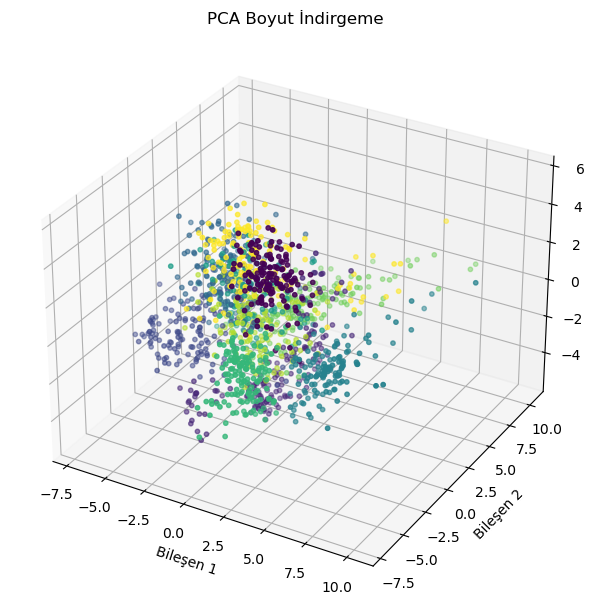

In [35]:
fig = plt.figure(figsize=(25, 20))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train_data_pca[:, 0], train_data_pca[:, 1], train_data_pca[:, 2], c=train_target, cmap='viridis', s=10)
ax1.set_title("PCA Boyut İndirgeme")
ax1.set_xlabel("Bileşen 1")
ax1.set_ylabel("Bileşen 2")
ax1.set_zlabel("Bileşen 3")

### LLE 3D scatter plot 

Text(0.5, 0, 'Bileşen 3')

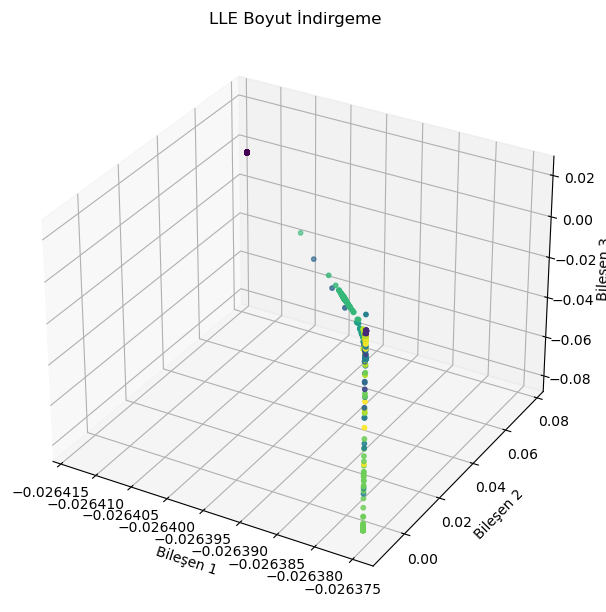

In [36]:
fig = plt.figure(figsize=(25, 20))

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(train_data_lle[:, 0], train_data_lle[:, 1], train_data_lle[:, 2], c=train_target, cmap='viridis', s=10)
ax2.set_title("LLE Boyut İndirgeme")
ax2.set_xlabel("Bileşen 1")
ax2.set_ylabel("Bileşen 2")
ax2.set_zlabel("Bileşen 3")

### Isomap 3D scatter plot 

Text(0.5, 0, 'Bileşen 3')

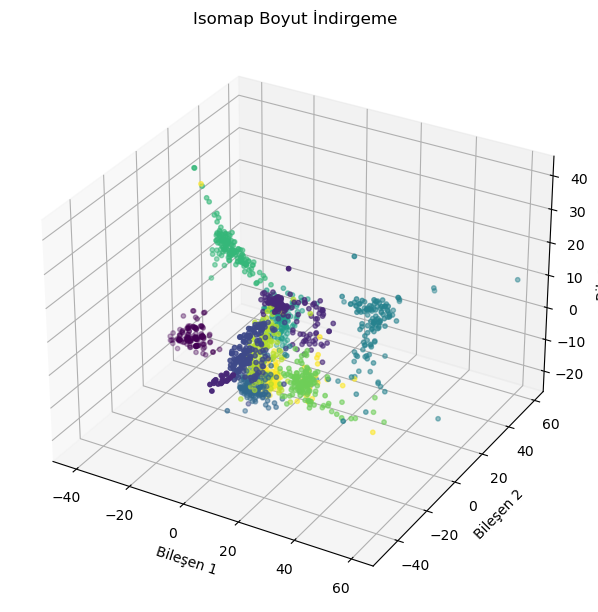

In [37]:
fig = plt.figure(figsize=(25, 20))

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(train_data_isomap[:, 0], train_data_isomap[:, 1], train_data_isomap[:, 2], c=train_target, cmap='viridis', s=10)
ax3.set_title("Isomap Boyut İndirgeme")
ax3.set_xlabel("Bileşen 1")
ax3.set_ylabel("Bileşen 2")
ax3.set_zlabel("Bileşen 3")